# Lab 7.05 - Time series analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

/tmp/ipykernel_40425/2839152206.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Dataframe


### Exercise 5 - Alcoholic beverages sales

The file US Retail.csv contains monthly retail sales of beer, wine, and liquor at U.S. liquor stores.

- Is seasonality present in these data?
- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


<Axes: xlabel='Month'>

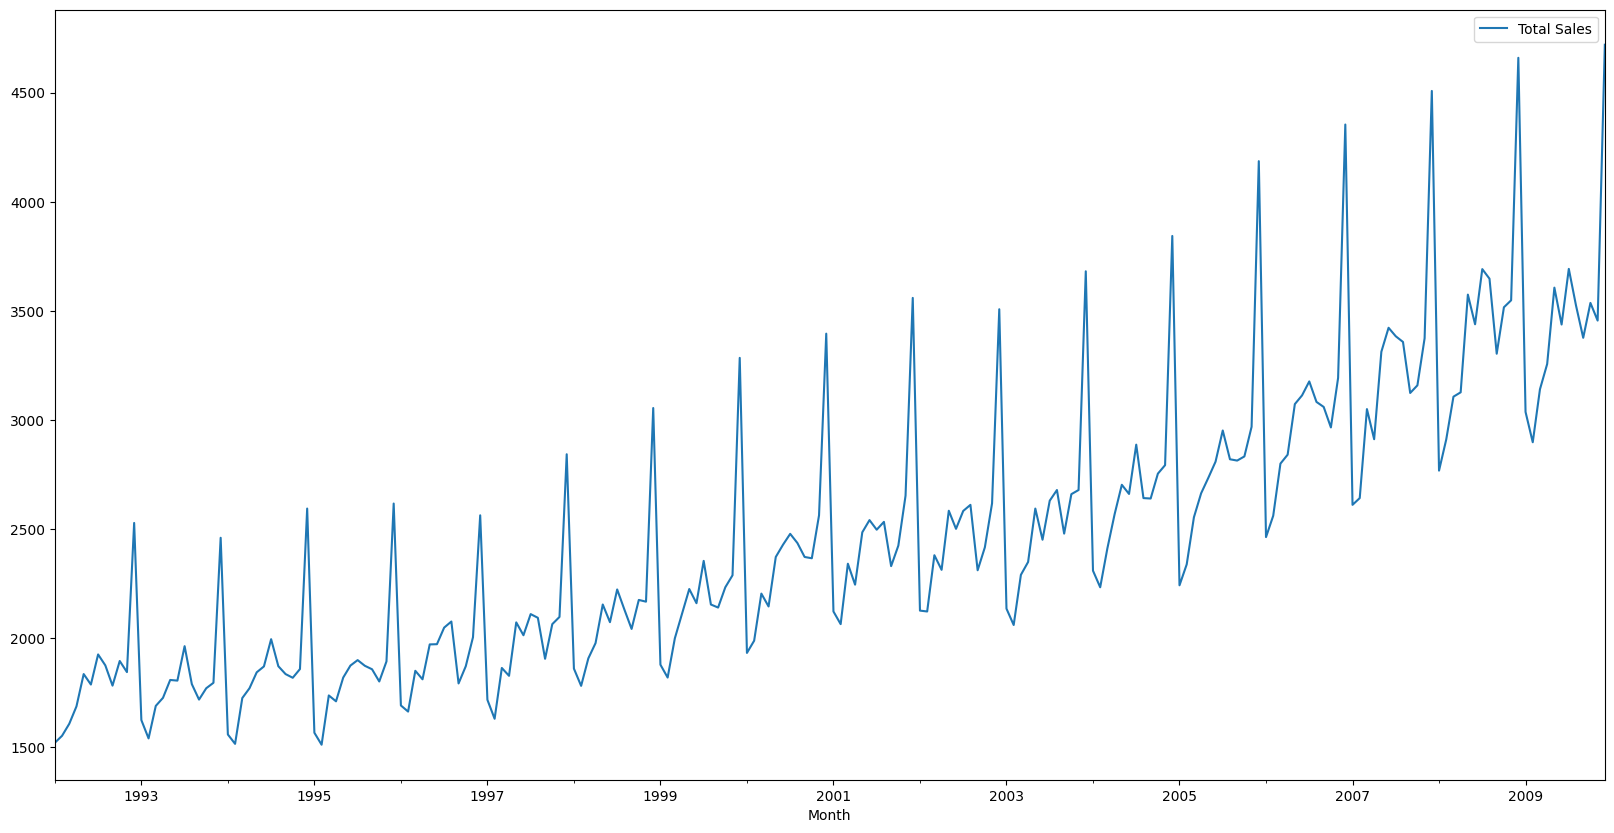

In [4]:
data.plot(y='Total Sales', figsize=[20,10])

In [8]:
#Obv bovenstaande grafiek leiden we af dat het seizoenselement heel belangrijk is, 
#dus best holt-winters gebruiken.
# We zullen eerst even een trendlijn berekenen
periods_data = len(data['Total Sales'])
x = np.arange(0,periods_data)
y = data['Total Sales']

a,b = np.polyfit(x,y,1)

print(f'y= {a} * x + {b}')

y= 8.790415461008113 * x + 1516.067374978665


<Axes: ylabel='Total Sales'>

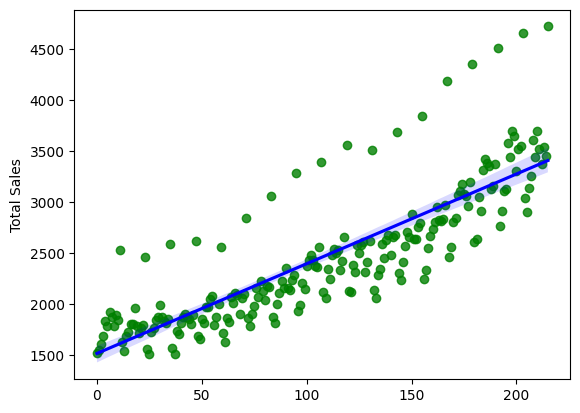

In [12]:
sns.regplot(x=np.arange(0,periods_data), y=data['Total Sales'], line_kws={'color': 'b'}, scatter_kws={'color':'g'})


<Axes: xlabel='Month'>

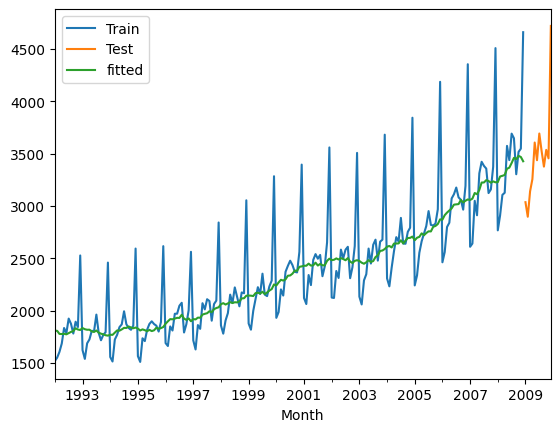

In [17]:
#Data set opsplitsen & data trainen
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data['Total Sales'][:-12]
test = data['Total Sales'][-12:]
#Seasonal zet je op 'mul' aangezien de trend altijd maar groter wordt
#Als de seasonal over de jaren heen gelijk blijft gebruik je 'add'
total_sales_hw = ExponentialSmoothing(train, trend='add',seasonal='mul',seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='Train')
test.plot(legend=True, label='Test')
(total_sales_hw.level + total_sales_hw.season).plot(legend='True', label='fitted')

<Axes: xlabel='Month'>

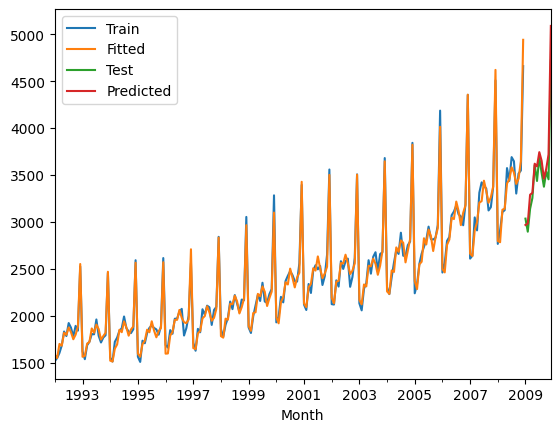

In [20]:
sales_predicted = total_sales_hw.forecast(12)

train.plot(legend=True, label='Train')
total_sales_hw.fittedvalues.plot(legend=True,label='Fitted')
test.plot(legend=True, label='Test')
sales_predicted.plot(legend=True,label='Predicted')

In [21]:
# Berekening Mean Absolute Error voor 2009
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE={mean_absolute_error(test,sales_predicted)}')
print(f'MSE={mean_squared_error(test,sales_predicted)}')

MAE=121.38897856160781
MSE=24512.19039345694


## Source
Business Analytics Data Analysis & Decision Making 